In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [3]:
# Step 2: Load dataset
# Make sure 'diabetes.csv' is in the same folder
data = pd.read_csv("diabetes.csv")

# Step 3: Display dataset information
print("Dataset Shape:", data.shape)
print(data.head())

# Step 4: Separate features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']


Dataset Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [4]:
# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Create and train the KNN model
k = 5  # You can change the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred = knn.predict(X_test_scaled)


Confusion Matrix:
 [[79 20]
 [27 28]]

Accuracy: 0.695
Error Rate: 0.305
Precision: 0.583
Recall: 0.509


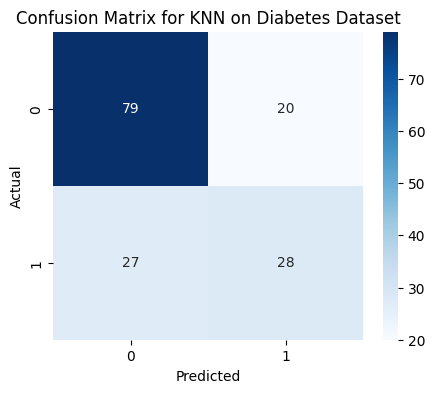

In [5]:
# Step 9: Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Step 10: Print evaluation results
print("\nConfusion Matrix:\n", cm)
print("\nAccuracy:", round(accuracy, 3))
print("Error Rate:", round(error_rate, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))

# Step 11: Display confusion matrix visually
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN on Diabetes Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [6]:
# 🤖 K-NEAREST NEIGHBORS (KNN) CLASSIFICATION — EXPLANATION 🤖
# ------------------------------------------------------------
# This code performs **KNN classification** on the Diabetes dataset to predict whether a person has diabetes.
#
# 1️⃣ **Data Loading & Overview:**
# The dataset is read using pandas and basic information (shape & first few rows) is printed to understand data structure.
# 'Outcome' is the target column — 1 means diabetic, 0 means non-diabetic.
#
# 2️⃣ **Feature & Target Split:**
# X contains independent features (like glucose, BMI, age, etc.).
# y contains the dependent variable (Outcome).
#
# 3️⃣ **Train-Test Split:**
# The data is divided into 80% for training and 20% for testing using `train_test_split` to evaluate performance properly.
#
# 4️⃣ **Feature Scaling:**
# Since KNN depends on distance (Euclidean), scaling is essential.
# StandardScaler normalizes features to have mean=0 and standard deviation=1, so all features contribute equally.
#
# 5️⃣ **Model Creation & Training:**
# KNeighborsClassifier with k=5 is used — meaning each prediction is based on the 5 nearest neighbors.
# The model learns the pattern from the training data.
#
# 6️⃣ **Prediction & Evaluation:**
# The trained model predicts outcomes for the test set.
# Metrics used:
#   - Confusion Matrix: Shows true vs predicted classifications.
#   - Accuracy: (TP+TN)/(Total Samples)
#   - Error Rate: 1 - Accuracy
#   - Precision: TP / (TP + FP)
#   - Recall: TP / (TP + FN)
#
# 7️⃣ **Visualization:**
# A heatmap is plotted for the confusion matrix using seaborn for better understanding of prediction accuracy visually.
#
# 💡 In summary, KNN classifies test samples based on the majority label of their nearest neighbors in feature space.
